# Linear Regression Case Study

# Step 1: Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Multiple linear regression case: Tips Data

In [2]:
df=sb.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.tail(11)

,total_bill,tip,sex,smoker,day,time,size
233,10.77,1.47,Male,No,Sat,Dinner,2
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Step 2: Explore the data 

In [5]:
print(df.shape)
type(df.shape)

(244, 7)


tuple

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [7]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
51,10.29,2.60,Female,No,Sun,Dinner,2
98,21.01,3.00,Male,Yes,Fri,Dinner,2
67,3.07,1.00,Female,Yes,Sat,Dinner,1
137,14.15,2.00,Female,No,Thur,Lunch,2


In [9]:
df.iloc[0:7,0:3]

,total_bill,tip,sex
0,16.99,1.01,Female
1,10.34,1.66,Male
2,21.01,3.50,Male
3,23.68,3.31,Male
4,24.59,3.61,Female
5,25.29,4.71,Male
6,8.77,2.00,Male


# Step 3: Analyse the data

In [10]:
print(df.groupby('day').sum())
#sum per day

      total_bill     tip  size
day                           
Thur     1096.33  171.83   152
Fri       325.88   51.96    40
Sat      1778.40  260.40   219
Sun      1627.16  247.39   216


In [11]:
print(df.groupby('day').count())
#62 thursdays

      total_bill  tip  sex  smoker  time  size
day                                           
Thur          62   62   62      62    62    62
Fri           19   19   19      19    19    19
Sat           87   87   87      87    87    87
Sun           76   76   76      76    76    76


In [12]:
df2=df.groupby('day').sum()
df2

,total_bill,tip,size
day,,,
Thur,1096.33,171.83,152
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216


In [13]:
df2.drop('size',inplace=True,axis=1)
df2
#sum of size column is not relavant

,total_bill,tip
day,,
Thur,1096.33,171.83
Fri,325.88,51.96
Sat,1778.40,260.40
Sun,1627.16,247.39


In [14]:
df2['percent']=df2['tip']/df2['total_bill']*100
df2

,total_bill,tip,percent
day,,,
Thur,1096.33,171.83,15.673201
Fri,325.88,51.96,15.944519
Sat,1778.40,260.40,14.642375
Sun,1627.16,247.39,15.203791


In [15]:
df2['percent']

day
Thur    15.673201
Fri     15.944519
Sat     14.642375
Sun     15.203791
Name: percent, dtype: float64

In [16]:
df3=df.groupby(['smoker','sex']).sum()
df3

total_bill     tip  size
smoker sex                             
Yes    Male       1337.07  183.07   150
       Female      593.27   96.74    74
No     Male       1919.75  302.00   263
       Female      977.68  149.77   140

In [17]:
df3['percent']=df3['tip']/df3['total_bill']*100
df3

total_bill     tip  size    percent
smoker sex                                        
Yes    Male       1337.07  183.07   150  13.691879
       Female      593.27   96.74    74  16.306235
No     Male       1919.75  302.00   263  15.731215
       Female      977.68  149.77   140  15.318918

In [18]:
df4=df.groupby(['day','size']).sum()
df4

total_bill     tip
day  size                    
Thur 1          10.07    1.83
     2         727.53  117.24
     3          76.64   10.77
     4         149.75   21.09
     5          41.19    5.00
     6          91.15   15.90
Fri  1           8.58    1.92
     2         261.15   42.31
     3          15.98    3.00
     4          40.17    4.73
     5            NaN     NaN
     6            NaN     NaN
Sat  1          10.32    2.00
     2         892.37  133.43
     3         459.17   68.36
     4         388.39   53.61
     5          28.15    3.00
     6            NaN     NaN
Sun  1            NaN     NaN
     2         684.84  109.86
     3         332.76   46.81
     4         480.39   73.58
     5          81.00   12.14
     6          48.17    5.00

In [19]:
df4['percent']=df4['tip']/df4['total_bill']*100
df4

total_bill     tip    percent
day  size                               
Thur 1          10.07    1.83  18.172790
     2         727.53  117.24  16.114799
     3          76.64   10.77  14.052714
     4         149.75   21.09  14.083472
     5          41.19    5.00  12.138869
     6          91.15   15.90  17.443774
Fri  1           8.58    1.92  22.377622
     2         261.15   42.31  16.201417
     3          15.98    3.00  18.773467
     4          40.17    4.73  11.774956
     5            NaN     NaN        NaN
     6            NaN     NaN        NaN
Sat  1          10.32    2.00  19.379845
     2         892.37  133.43  14.952318
     3         459.17   68.36  14.887732
     4         388.39   53.61  13.803136
     5          28.15    3.00  10.657194
     6            NaN     NaN        NaN
Sun  1            NaN     NaN        NaN
     2         684.84  109.86  16.041703
     3         332.76   46.81  14.067196
     4         480.39   73.58  15.316722
     5          81.00   12.14  14.987654
     6          48.17    5.00  10.379905

In [20]:
df5=df4.dropna(axis=0)
print(df5)

           total_bill     tip    percent
day  size                               
Thur 1          10.07    1.83  18.172790
     2         727.53  117.24  16.114799
     3          76.64   10.77  14.052714
     4         149.75   21.09  14.083472
     5          41.19    5.00  12.138869
     6          91.15   15.90  17.443774
Fri  1           8.58    1.92  22.377622
     2         261.15   42.31  16.201417
     3          15.98    3.00  18.773467
     4          40.17    4.73  11.774956
Sat  1          10.32    2.00  19.379845
     2         892.37  133.43  14.952318
     3         459.17   68.36  14.887732
     4         388.39   53.61  13.803136
     5          28.15    3.00  10.657194
Sun  2         684.84  109.86  16.041703
     3         332.76   46.81  14.067196
     4         480.39   73.58  15.316722
     5          81.00   12.14  14.987654
     6          48.17    5.00  10.379905


# Step 4: Visualize the data and inter_relationships

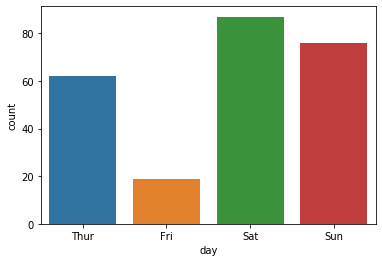

In [21]:
#tables per day
sb.countplot(x='day',data=df)

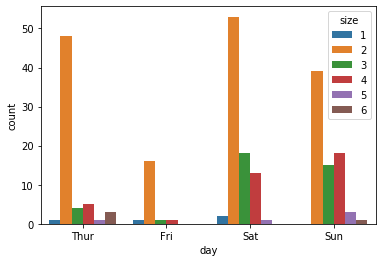

In [22]:
#tables per day per size.
sb.countplot(x='day',hue='size',data=df)

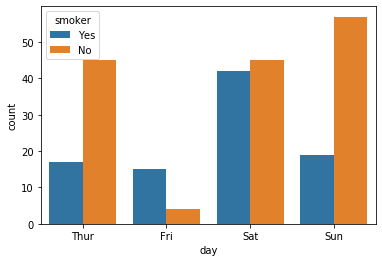

In [23]:
sb.countplot(x='day',hue='smoker',data=df)

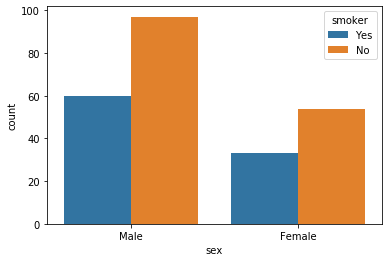

In [24]:
sb.countplot(x='sex',hue='smoker',data=df)

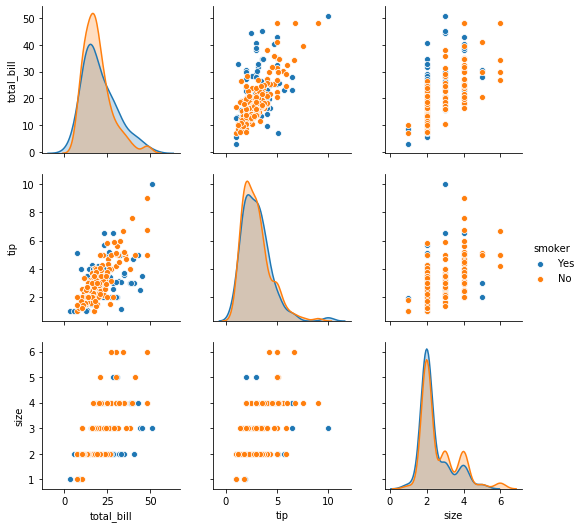

In [25]:
sb.pairplot(df,hue='smoker')

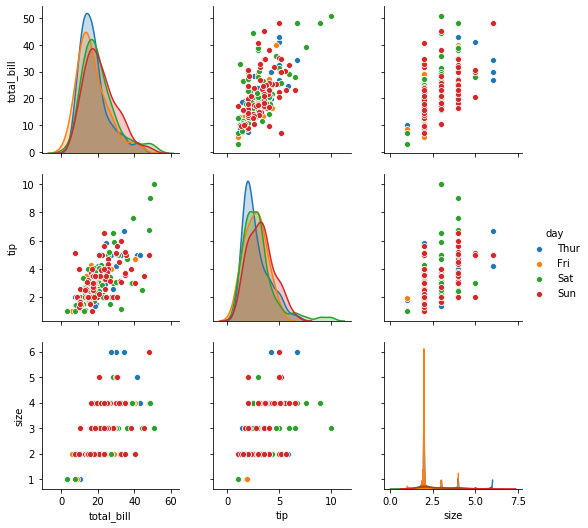

In [26]:
sb.pairplot(df,hue='day')

# Step 5:Transform and Clean the data

In [27]:
df.replace({'sex':{'Male':0,'Female':1},'smoker':{'No':0,'Yes':1}},inplace=True)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,Dinner,2
1,10.34,1.66,0,0,Sun,Dinner,3
2,21.01,3.50,0,0,Sun,Dinner,3
3,23.68,3.31,0,0,Sun,Dinner,2
4,24.59,3.61,1,0,Sun,Dinner,4


In [28]:
days=pd.get_dummies(df['day'])
days.sample(10)

day,Thur,Fri,Sat,Sun
98,0,1,0,0
226,0,1,0,0
89,1,0,0,0
159,0,0,0,1
149,1,0,0,0
212,0,0,1,0
192,1,0,0,0
209,0,0,1,0
134,1,0,0,0
115,0,0,0,1


In [29]:
days=pd.get_dummies(df['day'],drop_first=True)
days.sample(5)

day,Fri,Sat,Sun
130,0,0,0
213,0,1,0
167,0,0,1
87,0,0,0
106,0,1,0


In [30]:
days=pd.get_dummies(df['day'],drop_first=True)
df=pd.concat([df,days],axis=1)
df.tail(10)

,total_bill,tip,sex,smoker,day,time,size,Fri,Sat,Sun
234,15.53,3.00,0,1,Sat,Dinner,2,0,1,0
235,10.07,1.25,0,0,Sat,Dinner,2,0,1,0
236,12.60,1.00,0,1,Sat,Dinner,2,0,1,0
237,32.83,1.17,0,1,Sat,Dinner,2,0,1,0
238,35.83,4.67,1,0,Sat,Dinner,3,0,1,0
239,29.03,5.92,0,0,Sat,Dinner,3,0,1,0
240,27.18,2.00,1,1,Sat,Dinner,2,0,1,0
241,22.67,2.00,0,1,Sat,Dinner,2,0,1,0
242,17.82,1.75,0,0,Sat,Dinner,2,0,1,0
243,18.78,3.00,1,0,Thur,Dinner,2,0,0,0


In [31]:
times=pd.get_dummies(df['time'],drop_first=True)
df=pd.concat([df,times],axis=1)
df.tail(10)

,total_bill,tip,sex,smoker,day,time,size,Fri,Sat,Sun,Dinner
234,15.53,3.00,0,1,Sat,Dinner,2,0,1,0,1
235,10.07,1.25,0,0,Sat,Dinner,2,0,1,0,1
236,12.60,1.00,0,1,Sat,Dinner,2,0,1,0,1
237,32.83,1.17,0,1,Sat,Dinner,2,0,1,0,1
238,35.83,4.67,1,0,Sat,Dinner,3,0,1,0,1
239,29.03,5.92,0,0,Sat,Dinner,3,0,1,0,1
240,27.18,2.00,1,1,Sat,Dinner,2,0,1,0,1
241,22.67,2.00,0,1,Sat,Dinner,2,0,1,0,1
242,17.82,1.75,0,0,Sat,Dinner,2,0,1,0,1
243,18.78,3.00,1,0,Thur,Dinner,2,0,0,0,1


# Step 6: Building machine learning model,based on linear regression algorithm

In [32]:
x=df[['total_bill','sex','smoker','size','Fri','Sat','Sun','Dinner']]
y=df[['tip']]

In [33]:
y

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


In [34]:
x

,total_bill,sex,smoker,size,Fri,Sat,Sun,Dinner
0,16.99,1,0,2,0,0,1,1
1,10.34,0,0,3,0,0,1,1
2,21.01,0,0,3,0,0,1,1
3,23.68,0,0,2,0,0,1,1
4,24.59,1,0,4,0,0,1,1
...,...,...,...,...,...,...,...,...
239,29.03,0,0,3,0,1,0,1
240,27.18,1,1,2,0,1,0,1
241,22.67,0,1,2,0,1,0,1
242,17.82,0,0,2,0,1,0,1


In [35]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [73]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.85,random_state=26)

In [74]:
lr_mod=LinearRegression()
lr_mod.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
predictions=lr_mod.predict(x_test)
print(predictions)

[[1.69979207]
 [1.68727871]
 [2.1721675 ]
 [4.19766875]
 [5.35181966]
 [5.83918175]
 [4.4887978 ]
 [4.97259682]
 [2.6892832 ]
 [3.94176344]
 [3.32057033]
 [2.36829011]
 [3.50751845]
 [4.93270139]
 [3.88354504]
 [3.37530401]
 [2.48462684]
 [3.14544299]
 [5.708404  ]
 [1.86875255]
 [2.17883217]
 [2.41489946]
 [4.44697998]
 [3.78285174]
 [2.91984362]
 [3.98420831]
 [5.98792161]
 [2.30412531]
 [2.34131346]
 [2.85699845]
 [3.94779761]
 [5.8234334 ]
 [4.39709061]
 [3.63596824]
 [4.0092832 ]
 [2.79584095]
 [3.94713059]
 [0.52558269]
 [3.41512885]
 [2.01894504]
 [2.96295158]
 [6.52803435]
 [1.16307921]
 [4.26819819]
 [1.53877045]
 [3.51856203]
 [2.47070607]
 [2.73295034]
 [1.73105367]
 [2.43664216]
 [2.45523785]
 [3.67404384]
 [2.7149303 ]
 [2.64216321]
 [2.13048971]
 [4.11297096]
 [1.74992898]
 [2.26229173]
 [1.08360595]
 [3.77070576]
 [1.91634706]
 [3.59164144]
 [2.47594003]
 [2.98829627]
 [3.09907043]
 [1.56970687]
 [3.18482539]
 [2.78513219]
 [5.10222124]
 [2.95489235]
 [3.10766927]
 [2.58

In [76]:
myvals=np.array([100,0,0,3,0,0,1,0]).reshape(1,-1)
lr_mod.predict(myvals)

array([[12.9121466]])

In [77]:
lr_mod.score(x_train,y_train)

0.6082861769051666